In [100]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [101]:
pd.set_option('display.max_columns',None)

In [102]:
df=pd.read_csv('census_income.csv')
df.head(20)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [103]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [104]:
df.shape

(32560, 15)

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


There are 32560 rows in the dataset and there is no null value present. There are both categorical and numerical columns in the dataset

<AxesSubplot:>

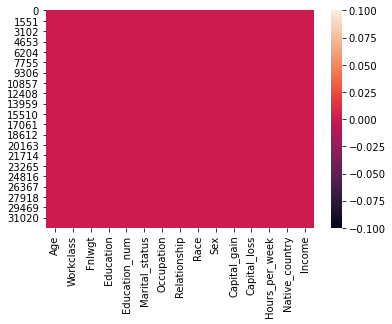

In [106]:
sns.heatmap(df.isnull())

In [107]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [108]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

Handling Numerical Columns

In [129]:
num_data = df.select_dtypes(include=['int'])
print(num_data.columns)

Index(['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss',
       'Hours_per_week'],
      dtype='object')


fnlwgt is sampling weight and not really helping in predicting income, so we will remove this column.

Data Visualizations

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Fnlwgt'}>],
       [<AxesSubplot:title={'center':'Education_num'}>,
        <AxesSubplot:title={'center':'Capital_gain'}>],
       [<AxesSubplot:title={'center':'Capital_loss'}>,
        <AxesSubplot:title={'center':'Hours_per_week'}>]], dtype=object)

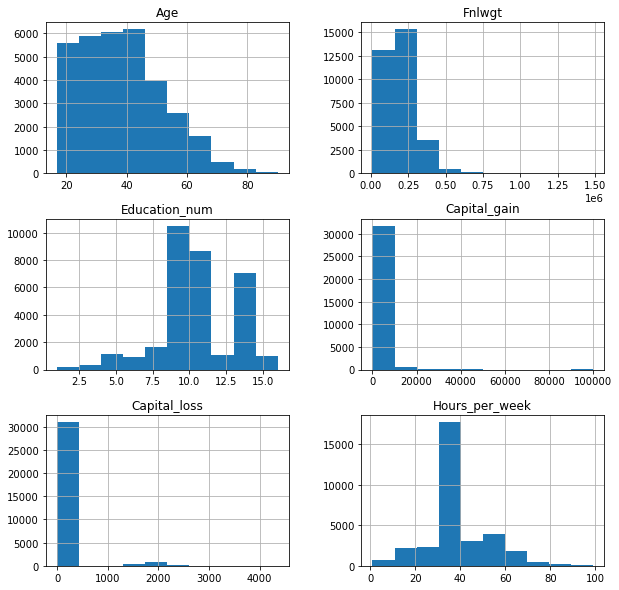

In [130]:
num_data.hist(figsize=(10,10))

In [131]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


There are values which are on diffrent scales. So, we will tune them to same scale by using scaling technique so the our machine learning models prediction will be of greater accuracy.

Count of No. of rows in every column are same, it means that there are no missing values in the data set. In columns Captital gain, capital loss and Age Mean is greater than median. In column Age, Hours per week there is large gap b/w max and 75th percentile,there are chances that some outliers may present. High standard deviation in column Captital gain,capital loss, means data is spreaded.

Handling Object type Columns

In [149]:
categorical_data = df.select_dtypes(include=['object'])
print(categorical_data.columns)

Index(['Workclass', 'Education', 'Marital_status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native_country', 'Income'],
      dtype='object')


The column "education" is same as column education-num but it is in string form. So, We will drop the column "education" from data.

In [133]:
import seaborn as sns
from matplotlib import pyplot as plt

<AxesSubplot:xlabel='count', ylabel='Workclass'>

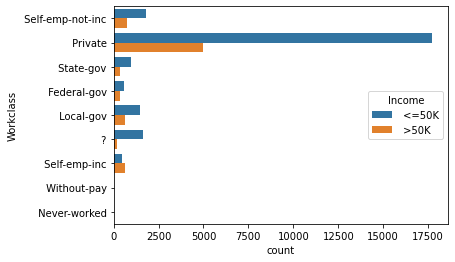

In [134]:
sns.countplot(y='Workclass', hue='Income', data = categorical_data)

<AxesSubplot:xlabel='count', ylabel='Occupation'>

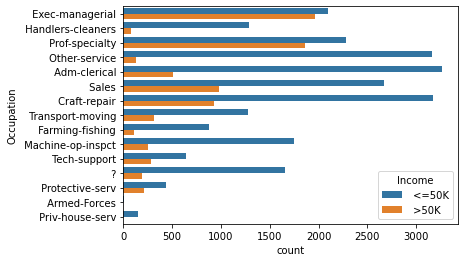

In [135]:
sns.countplot(y='Occupation', hue='Income', data = categorical_data)

<AxesSubplot:xlabel='Income', ylabel='count'>

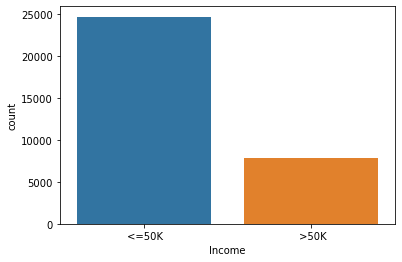

In [136]:
sns.countplot(df.Income)

In [137]:
df.skew()

Age                0.558738
Fnlwgt             1.446972
Education_num     -0.311630
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
dtype: float64

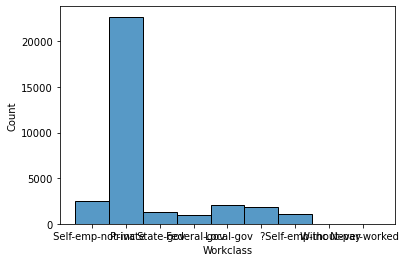

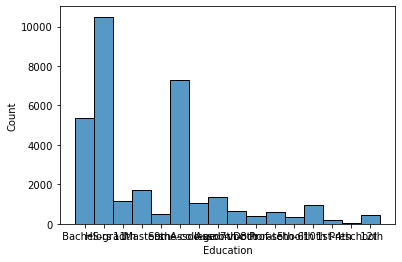

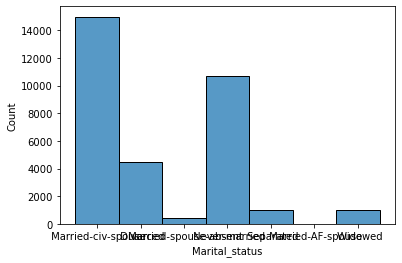

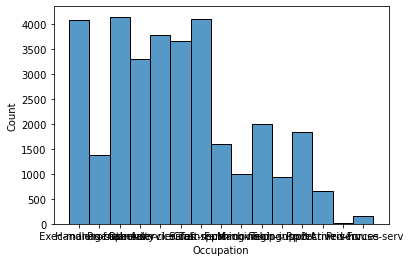

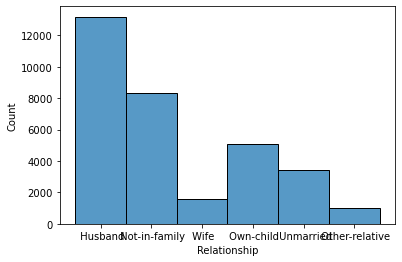

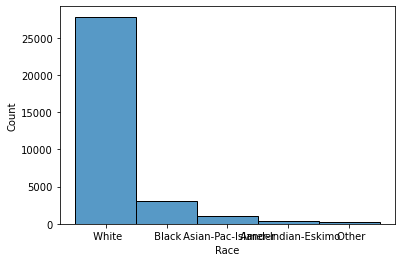

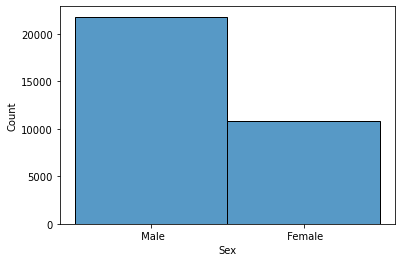

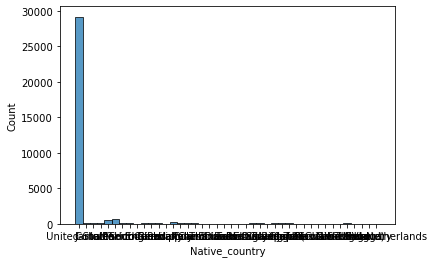

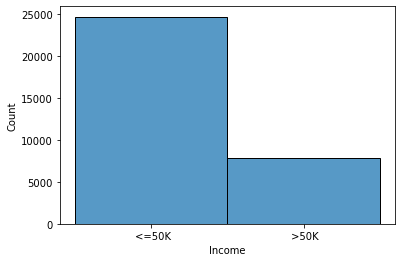

In [155]:
for i in categorical_data:
  sns.histplot(df[i])
  plt.show()

As we can see that there are some values with "?". So, we will replace them with nan values. 

In [157]:
df.columns = df.columns.str.replace(' ', '')

In [158]:
df= df.replace(to_replace = "?", value = np.nan)
df.head(20)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [159]:
df.isnull().count()

Age               32560
Workclass         32560
Fnlwgt            32560
Education         32560
Education_num     32560
Marital_status    32560
Occupation        32560
Relationship      32560
Race              32560
Sex               32560
Capital_gain      32560
Capital_loss      32560
Hours_per_week    32560
Native_country    32560
Income            32560
dtype: int64

In [160]:
df['Native_country'] = df['Native_country'].replace(' ?' , np.nan )
df['Age'] = df['Age'].replace(' ?' , np.nan )
df['Workclass'] = df['Workclass'].replace(' ?' , np.nan )
df['Fnlwgt'] = df['Fnlwgt'].replace(' ?' , np.nan )
df['Education'] = df['Education'].replace(' ?' , np.nan )
df['Education_num'] = df['Education_num'].replace(' ?' , np.nan )
df['Marital_status'] = df['Marital_status'].replace(' ?' , np.nan )
df['Occupation'] = df['Occupation'].replace(' ?' , np.nan )
df['Relationship'] = df['Relationship'].replace(' ?' , np.nan )
df['Race'] = df['Race'].replace(' ?' , np.nan )
df['Sex'] = df['Sex'].replace(' ?' , np.nan )
df['Capital_gain'] = df['Capital_gain'].replace(' ?' , np.nan )
df['Capital_loss'] = df['Capital_loss'].replace(' ?' , np.nan )
df['Hours_per_week'] = df['Hours_per_week'].replace(' ?' , np.nan )

In [161]:
df.isna().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

Occupation, Workclass and Native_country columns have the nan values

Now we will replace all null values with their mode values

In [162]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

In [163]:
imp= SimpleImputer(strategy='most_frequent')
df['Workclass']=imp.fit_transform(df['Workclass'].values.reshape(-1, 1))
df.head(2)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [164]:
imp= SimpleImputer(strategy='most_frequent')
df['Occupation']=imp.fit_transform(df['Occupation'].values.reshape(-1, 1))
df.head(2)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [165]:
imp= SimpleImputer(strategy='most_frequent')
df['Native_country']=imp.fit_transform(df['Native_country'].values.reshape(-1, 1))
df.head(2)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [166]:
df.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [167]:
df.duplicated().sum()

24

In [168]:
df = df.drop_duplicates(keep= 'first')
df.shape

(32536, 15)

In [169]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

list1=['Workclass', 'Education', 'Marital_status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native_country', 'Income']
for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))

df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
1,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
2,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
3,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0
4,37,3,284582,12,14,2,3,5,4,0,0,0,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3,257302,7,12,2,12,5,4,0,0,0,38,38,0
32556,40,3,154374,11,9,2,6,0,4,1,0,0,40,38,1
32557,58,3,151910,11,9,6,0,4,4,0,0,0,40,38,0
32558,22,3,201490,11,9,4,0,3,4,1,0,0,20,38,0


Age                  AxesSubplot(0.125,0.657941;0.110714x0.222059)
Workclass         AxesSubplot(0.257857,0.657941;0.110714x0.222059)
Fnlwgt            AxesSubplot(0.390714,0.657941;0.110714x0.222059)
Education         AxesSubplot(0.523571,0.657941;0.110714x0.222059)
Education_num     AxesSubplot(0.656429,0.657941;0.110714x0.222059)
Marital_status    AxesSubplot(0.789286,0.657941;0.110714x0.222059)
Occupation           AxesSubplot(0.125,0.391471;0.110714x0.222059)
Relationship      AxesSubplot(0.257857,0.391471;0.110714x0.222059)
Race              AxesSubplot(0.390714,0.391471;0.110714x0.222059)
Sex               AxesSubplot(0.523571,0.391471;0.110714x0.222059)
Capital_gain      AxesSubplot(0.656429,0.391471;0.110714x0.222059)
Capital_loss      AxesSubplot(0.789286,0.391471;0.110714x0.222059)
Hours_per_week          AxesSubplot(0.125,0.125;0.110714x0.222059)
Native_country       AxesSubplot(0.257857,0.125;0.110714x0.222059)
Income               AxesSubplot(0.390714,0.125;0.110714x0.222

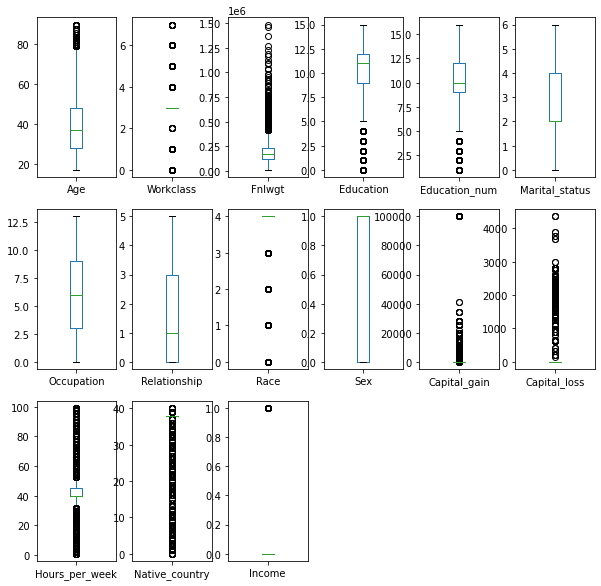

In [170]:
df.plot(kind='box',subplots=True,layout=(3,6),figsize=(10,10))

There is presence of outliers in Fnlwgt, capital gain,Hours_per_week ,Native_country and capital loss columns

In [171]:
df.drop(['Fnlwgt','Education'],axis=1,inplace=True)
df.head()

,Age,Workclass,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,13,2,3,0,4,1,0,0,13,38,0
1,38,3,9,0,5,1,4,1,0,0,40,38,0
2,53,3,7,2,5,0,2,1,0,0,40,38,0
3,28,3,13,2,9,5,2,0,0,0,40,4,0
4,37,3,14,2,3,5,4,0,0,0,40,38,0


In [172]:
df.shape

(32536, 13)

In [173]:
df.dtypes

Age               int64
Workclass         int64
Education_num     int64
Marital_status    int64
Occupation        int64
Relationship      int64
Race              int64
Sex               int64
Capital_gain      int64
Capital_loss      int64
Hours_per_week    int64
Native_country    int64
Income            int64
dtype: object

In [174]:
df.corr()

,Age,Workclass,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.040463,0.036224,-0.266142,0.001756,-0.263744,0.029116,0.088708,0.077676,0.057745,0.068515,-0.000659,0.234039
Workclass,0.040463,1.000000,0.003412,-0.020506,0.007285,-0.057904,0.048322,0.071522,0.031497,0.002661,0.042208,-0.001691,0.002747
Education_num,0.036224,0.003412,1.000000,-0.069196,0.070965,-0.094424,0.031998,0.012181,0.122661,0.079901,0.148426,0.088044,0.335299
Marital_status,-0.266142,-0.020506,-0.069196,1.000000,0.034901,0.185542,-0.067942,-0.129425,-0.043373,-0.034134,-0.190433,-0.020892,-0.199187
Occupation,0.001756,0.007285,0.070965,0.034901,1.000000,-0.037443,-0.004789,0.047683,0.018013,0.009644,-0.012851,-0.002124,0.034490
Relationship,-0.263744,-0.057904,-0.094424,0.185542,-0.037443,1.000000,-0.116048,-0.582593,-0.057945,-0.061100,-0.248876,-0.010838,-0.250955
Race,0.029116,0.048322,0.031998,-0.067942,-0.004789,-0.116048,1.000000,0.087464,0.011152,0.018916,0.041921,0.116848,0.071855
Sex,0.088708,0.071522,0.012181,-0.129425,0.047683,-0.582593,0.087464,1.000000,0.048486,0.045576,0.229190,0.001745,0.215984
Capital_gain,0.077676,0.031497,0.122661,-0.043373,0.018013,-0.057945,0.011152,0.048486,1.000000,-0.031638,0.078408,0.008776,0.223340
Capital_loss,0.057745,0.002661,0.079901,-0.034134,0.009644,-0.061100,0.018916,0.045576,-0.031638,1.000000,0.054229,0.009337,0.150498


<AxesSubplot:>

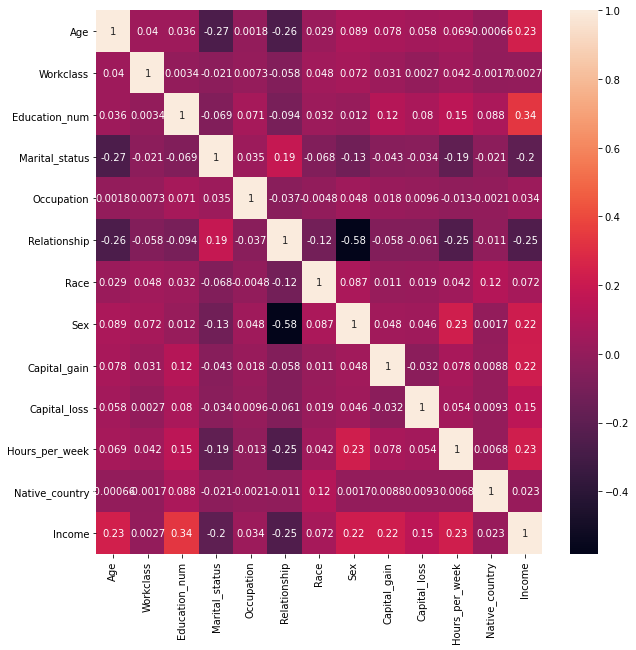

In [175]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,annot_kws={'size': 10})

As we can see that feature "Relationship" and "Marital status" are not highly correlated with the output i.e income. So, we can drop these two. Also these features doesnt affect the income slab, so we can drop them.

In [176]:
df.drop(['Relationship','Marital_status'],axis=1,inplace=True)
df.head()

,Age,Workclass,Education_num,Occupation,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,13,3,4,1,0,0,13,38,0
1,38,3,9,5,4,1,0,0,40,38,0
2,53,3,7,5,2,1,0,0,40,38,0
3,28,3,13,9,2,0,0,0,40,4,0
4,37,3,14,3,4,0,0,0,40,38,0


In [177]:
df['Capital_gain'].describe()

count    32536.000000
mean      1078.410069
std       7388.068465
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: Capital_gain, dtype: float64

variance in this feature is too high.

In [178]:
df['Capital_loss'].describe()

count    32536.000000
mean        87.370912
std        403.107737
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: Capital_loss, dtype: float64

variance in this feature is too high.

If we will try to remove the outliers in Capital_gain and Caital_loss columns of dataset then we will loosing a huge data, so we can drop these two as it dont have affect the Income slab of a person. These profits are other than income slabs. 

In [179]:
df.drop(['Capital_gain','Capital_loss'],axis=1,inplace=True)
df.head()

,Age,Workclass,Education_num,Occupation,Race,Sex,Hours_per_week,Native_country,Income
0,50,5,13,3,4,1,13,38,0
1,38,3,9,5,4,1,40,38,0
2,53,3,7,5,2,1,40,38,0
3,28,3,13,9,2,0,40,4,0
4,37,3,14,3,4,0,40,38,0


# Multicollinearity using VIF

In [180]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [181]:
def vif_calc():
    vif=pd.DataFrame()
    vif['features']=x.columns
    vif['VIF Factor']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    print(vif)

In [182]:
vif_calc()

          features  VIF Factor
0              Age    8.844022
1        Workclass    8.411623
2    Education_num   15.763638
3   Marital_status    4.046668
4       Occupation    3.373214
5     Relationship    2.643627
6             Race   17.761679
7              Sex    4.462233
8     Capital_gain    1.044512
9     Capital_loss    1.061455
10  Hours_per_week   11.921608
11  Native_country   28.154983


Here as we compare Age and Workclass then we can drop Workclass as it has less correlation with the output.

In [184]:
df.drop(['Workclass'],axis=1)

,Age,Education_num,Occupation,Race,Sex,Hours_per_week,Native_country,Income
0,50,13,3,4,1,13,38,0
1,38,9,5,4,1,40,38,0
2,53,7,5,2,1,40,38,0
3,28,13,9,2,0,40,4,0
4,37,14,3,4,0,40,38,0
...,...,...,...,...,...,...,...,...
32555,27,12,12,4,0,38,38,0
32556,40,9,6,4,1,40,38,1
32557,58,9,0,4,0,40,38,0
32558,22,9,0,4,1,20,38,0


In [185]:
x=df.iloc[:,0:-1]
x

,Age,Workclass,Education_num,Occupation,Race,Sex,Hours_per_week,Native_country
0,50,5,13,3,4,1,13,38
1,38,3,9,5,4,1,40,38
2,53,3,7,5,2,1,40,38
3,28,3,13,9,2,0,40,4
4,37,3,14,3,4,0,40,38
...,...,...,...,...,...,...,...,...
32555,27,3,12,12,4,0,38,38
32556,40,3,9,6,4,1,40,38
32557,58,3,9,0,4,0,40,38
32558,22,3,9,0,4,1,20,38


In [186]:
y=df.iloc[:,-1]
y

0        0
1        0
2        0
3        0
4        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: Income, Length: 32536, dtype: int64

# Removing Outliers using Zscore

In [187]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
z

array([[0.83696128, 1.72077673, 1.13481701, ..., 2.22244997, 0.26113544,
        0.56338883],
       [0.04293421, 0.08520345, 0.42064566, ..., 0.03566429, 0.26113544,
        0.56338883],
       [1.05693515, 0.08520345, 1.198377  , ..., 0.03566429, 0.26113544,
        0.56338883],
       ...,
       [1.42355827, 0.08520345, 0.42064566, ..., 0.03566429, 0.26113544,
        0.56338883],
       [1.21612819, 0.08520345, 0.42064566, ..., 1.65550554, 0.26113544,
        0.56338883],
       [0.98361053, 0.81778664, 0.42064566, ..., 0.03566429, 0.26113544,
        1.77497307]])

In [188]:
threshold=3
print(np.where(z>3))

(array([    3,     9,    10, ..., 32508, 32526, 32528]), array([7, 6, 4, ..., 4, 4, 4]))


In [189]:
df_new=df[(z<3).all(axis=1)]

In [190]:
df_new.head()

,Age,Workclass,Education_num,Occupation,Race,Sex,Hours_per_week,Native_country,Income
0,50,5,13,3,4,1,13,38,0
1,38,3,9,5,4,1,40,38,0
2,53,3,7,5,2,1,40,38,0
4,37,3,14,3,4,0,40,38,0
5,49,3,5,7,2,0,16,22,0


In [191]:
df=df_new

In [192]:
df.shape

(29597, 9)

In [193]:
loss_percentage=(32536-29597)/32536*100
print(loss_percentage)

9.0330710597492


# Removing Skewness

In [194]:
from sklearn.preprocessing import power_transform

In [195]:
x=power_transform(x,method='yeo-johnson')
x

array([[ 0.89173318,  1.7433767 ,  1.16458639, ...,  0.70303571,
        -2.2221858 ,  0.29415087],
       [ 0.10225939, -0.09611858, -0.4646586 , ...,  0.70303571,
        -0.03572539,  0.29415087],
       [ 1.06424234, -0.09611858, -1.20102651, ...,  0.70303571,
        -0.03572539,  0.29415087],
       ...,
       [ 1.3345502 , -0.09611858, -0.4646586 , ..., -1.42240286,
        -0.03572539,  0.29415087],
       [-1.35880702, -0.09611858, -0.4646586 , ...,  0.70303571,
        -1.65541442,  0.29415087],
       [ 1.00765904,  0.81682972, -0.4646586 , ..., -1.42240286,
        -0.03572539,  0.29415087]])

# Scaling of the data

In [196]:
from sklearn.preprocessing import StandardScaler

In [197]:
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.89173318,  1.7433767 ,  1.16458639, ...,  0.70303571,
        -2.2221858 ,  0.29415087],
       [ 0.10225939, -0.09611858, -0.4646586 , ...,  0.70303571,
        -0.03572539,  0.29415087],
       [ 1.06424234, -0.09611858, -1.20102651, ...,  0.70303571,
        -0.03572539,  0.29415087],
       ...,
       [ 1.3345502 , -0.09611858, -0.4646586 , ..., -1.42240286,
        -0.03572539,  0.29415087],
       [-1.35880702, -0.09611858, -0.4646586 , ...,  0.70303571,
        -1.65541442,  0.29415087],
       [ 1.00765904,  0.81682972, -0.4646586 , ..., -1.42240286,
        -0.03572539,  0.29415087]])

In [199]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [200]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [202]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=90)

In [203]:
x_train.shape

(22775, 8)

In [204]:
x_test.shape

(9761, 8)

In [ ]:
y_train.shape

In [208]:
lr=LogisticRegression()
gnb=GaussianNB()
svc=SVC()
dtc=DecisionTreeClassifier()
knc=KNeighborsClassifier()

model=[lr,gnb,svc,dtc,knc]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Predicted result value:',predm)
    print('actual value',y_test)
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

Predicted result value: [0 0 1 ... 0 0 1]
actual value 14349    0
30940    1
10452    1
18159    0
19838    0
        ..
1513     1
6671     0
32287    0
2024     0
15766    1
Name: Income, Length: 9761, dtype: int64
0.8022743571355394
[[6916  516]
 [1414  915]]
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      7432
           1       0.64      0.39      0.49      2329

    accuracy                           0.80      9761
   macro avg       0.73      0.66      0.68      9761
weighted avg       0.78      0.80      0.78      9761



Predicted result value: [0 0 1 ... 0 0 1]
actual value 14349    0
30940    1
10452    1
18159    0
19838    0
        ..
1513     1
6671     0
32287    0
2024     0
15766    1
Name: Income, Length: 9761, dtype: int64
0.7831164839668067
[[6337 1095]
 [1022 1307]]
              precision    recall  f1-score   support

           0       0.86      0.85      0.86      7432
           1       0.54      0.56   

From above logistic and classifiers below are the accuracy percentage: logistic 80.22% GaussianNB 78% SVC 80.88% DecisionTreeClassifier 76% KNeighborsClassifier 79%.

So, out of these SVC is best. we will test boosting method also to check accuracy and then select the best model.

In [211]:
adc=AdaBoostClassifier()
gdc=GradientBoostingClassifier()

model=[adc,gdc]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Predicted result value:',predm)
    print('actual value',y_test)
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

Predicted result value: [0 0 1 ... 0 0 1]
actual value 14349    0
30940    1
10452    1
18159    0
19838    0
        ..
1513     1
6671     0
32287    0
2024     0
15766    1
Name: Income, Length: 9761, dtype: int64
0.814875525048663
[[6867  565]
 [1242 1087]]
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      7432
           1       0.66      0.47      0.55      2329

    accuracy                           0.81      9761
   macro avg       0.75      0.70      0.71      9761
weighted avg       0.80      0.81      0.80      9761



Predicted result value: [0 0 1 ... 0 0 1]
actual value 14349    0
30940    1
10452    1
18159    0
19838    0
        ..
1513     1
6671     0
32287    0
2024     0
15766    1
Name: Income, Length: 9761, dtype: int64
0.8171293924802786
[[6892  540]
 [1245 1084]]
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      7432
           1       0.67      0.47    

From above all the model these are the top three models with accuracy percentage:
AdaBoost 81.48% ,GradientBoost 81.71% ,logistic 80.22%, SVC 80.88%

So, best model comes out to be GradientBoost having accuracy of 81.71%. We will check the CV score and then We will tune it further to get the best result.

# Cross Validation

In [209]:
from sklearn.model_selection import cross_val_score

In [210]:
lr=LogisticRegression()
gnb=GaussianNB()
svc=SVC()
dtc=DecisionTreeClassifier()
knc=KNeighborsClassifier()

model_cv=[lr,gnb,svc,dtc,knc]

for i in model_cv:
    score=cross_val_score(i,x,y,cv=5)
    print(score)
    print (score.mean())
    print (score.std())

[0.79824831 0.80328877 0.8054403  0.80651606 0.80436453]
0.8035715921835017
0.002870819272927257
[0.77735095 0.78161979 0.79099431 0.79299216 0.7879207 ]
0.7861755847255978
0.005854240670124108
[0.80608482 0.81158752 0.81542954 0.81081912 0.80805287]
0.8103947722508472
0.0031941134411399173
[0.75153657 0.75303519 0.76025818 0.75964346 0.75595513]
0.7560857065753689
0.0034665402036485127
[0.78411186 0.79114799 0.7934532  0.79852467 0.78699862]
0.790847268730219
0.005019991660359643


In [212]:
adc=AdaBoostClassifier()
gdc=GradientBoostingClassifier()

model_cv1=[adc,gdc]

for i in model_cv1:
    score=cross_val_score(i,x,y,cv=5)
    print(score)
    print (score.mean())
    print (score.std())

[0.81054087 0.81128016 0.81957892 0.82065468 0.80912863]
0.8142366515791372
0.004862558250421312
[0.81346036 0.81742739 0.82234517 0.82634086 0.81358537]
0.8186318284814359
0.005037452860571693


In Cross validation also our scores are matching,and in this also GradientBoost model is performing best.

# Hypermeter Tuning

In [213]:
from sklearn.model_selection import GridSearchCV

In [219]:
param_gdc={'learning_rate':[0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]}
modelgdc=GradientBoostingClassifier()

In [217]:
gridgdc=GridSearchCV(estimator=modelgdc,param_grid=param_gdc)
gridgdc.fit(x,y)
print(gridgdc)
print(gridgdc.best_score_)
print(gridgdc.best_estimator_)
print(gridgdc.best_params_)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.05, 0.075, 0.1, 0.25, 0.5, 0.75,
                                           1]})
0.8203222731436968
GradientBoostingClassifier(learning_rate=0.25)
{'learning_rate': 0.25}


So, here our best learning rate comes out to be 0.25 and which has increased the accuracy by around 1%, we will use it to predict the final result.

In [232]:
gdc_final=GradientBoostingClassifier(n_estimators=20, learning_rate=0.25, max_features=2, max_depth=2, random_state=0)
gdc_final.fit(x_train,y_train)
gdc_final.score(x_train,y_train)

0.8092645444566411

In [233]:
pred_final=gdc_final.predict(x_test)
print('Predicted result value:',pred_final)
print('actual value',y_test)

Predicted result value: [0 0 1 ... 0 0 1]
actual value 14349    0
30940    1
10452    1
18159    0
19838    0
        ..
1513     1
6671     0
32287    0
2024     0
15766    1
Name: Income, Length: 9761, dtype: int64


In [234]:
print('accuracy_score:',accuracy_score(y_test,pred_final))
print(confusion_matrix(y_test,pred_final))
print(classification_report(y_test,pred_final))

accuracy_score: 0.8088310623911484
[[7095  337]
 [1529  800]]
              precision    recall  f1-score   support

           0       0.82      0.95      0.88      7432
           1       0.70      0.34      0.46      2329

    accuracy                           0.81      9761
   macro avg       0.76      0.65      0.67      9761
weighted avg       0.79      0.81      0.78      9761



Hence, our Model "GradientBoostingClassifier" has an acuury of 81%

# Plotting AOC-ROC Curve

In [223]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [224]:
y_pred_prob=gdc_final.predict_proba(x_test)[:,1]

In [225]:
y_pred_prob

array([0.03605878, 0.2664079 , 0.6786786 , ..., 0.00482372, 0.03501522,
       0.67159756])

In [226]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [227]:
fpr

array([0.        , 0.        , 0.        , ..., 0.99892357, 0.99973089,
       1.        ])

In [228]:
tpr

array([0.00000000e+00, 4.29368828e-04, 2.57621297e-03, ...,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00])

In [229]:
thresholds

array([1.93016091, 0.93016091, 0.90234974, ..., 0.00343291, 0.00323135,
       0.00312458])

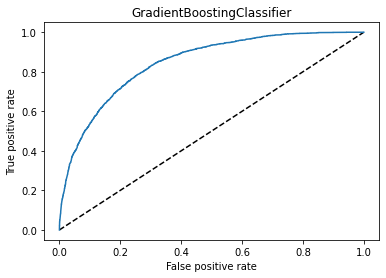

In [230]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='GradientBoostingClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('GradientBoostingClassifier')
plt.show()

In [231]:
import pickle
filename='Census_Income_Data.pkl'
pickle.dump(gdc_final, open(filename,'wb'))